In [2]:
import numpy
import xarray
import glob

%pylab inline
pylab.rcParams['figure.figsize'] = (12,12) # Large figures
pylab.rcParams['image.cmap'] = 'seismic'
dpi=200

### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

Populating the interactive namespace from numpy and matplotlib


In [3]:
mesh = xarray.open_dataset('/compyfs/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.200908.nc')
files = sorted(glob.glob('/compyfs/vanr302/e3sm_scratch/20211012_EC60to30E2r2_JRA_compy_varGM/run/*mpaso.hist.am.timeSeriesStatsMonthly.*'))

In [5]:
nt = 12
try:
    ds.close()
except:
    pass
ds = xarray.open_dataset(files[nt])

In [10]:
#a good way to find the odd stratifications is to look where BLD + X < MLD, where X is a cutoff value to move beyond
#   small roundoff diffs
bld = ds.timeMonthly_avg_boundaryLayerDepth[0,:].values
mld = ds.timeMonthly_avg_dThreshMLD[0,:].values

inds = numpy.where(bld + 100 < mld)[0]

(-521.4059143066406, 0.0)

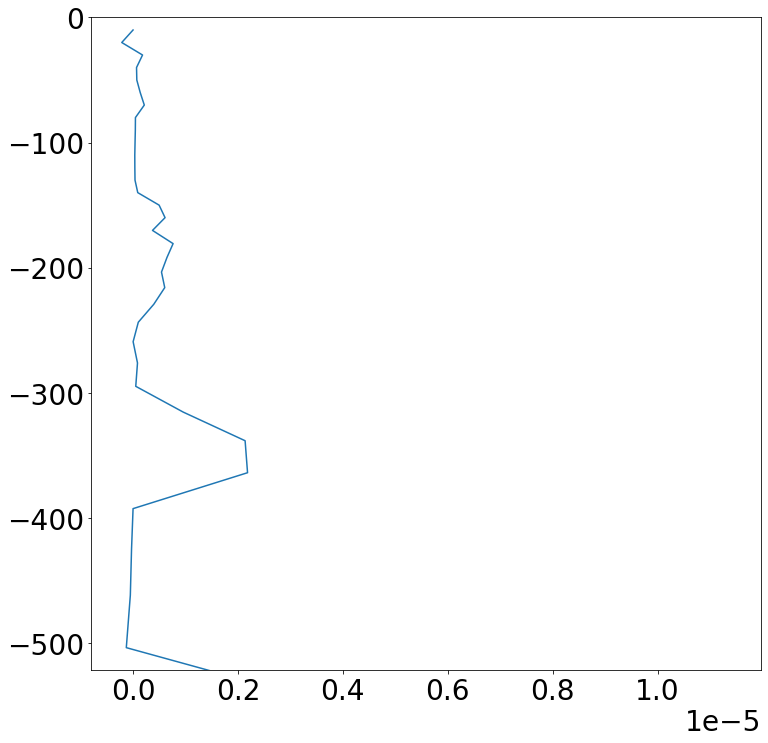

In [12]:
ns=20 #I usually have to cycle a bit to find the most problematic spots
mlc = mesh.maxLevelCell[inds[ns]].values
plt.plot(ds.timeMonthly_avg_BruntVaisalaFreqTop[0,inds[ns],:mlc],-mesh.refBottomDepth[:mlc])
plt.ylim(-mld[inds[ns]]-50,0)

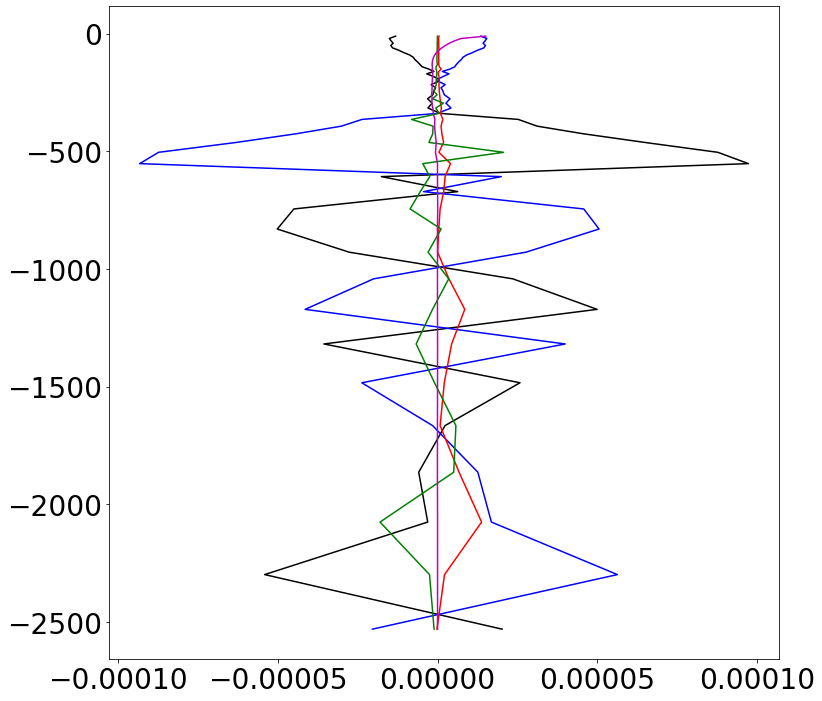

In [15]:
hadv = ds.timeMonthly_avg_activeTracerHorizontalAdvectionTendency_temperatureHorizontalAdvectionTendency[0,inds[ns],:].values
vadv = ds.timeMonthly_avg_activeTracerVerticalAdvectionTendency_temperatureVerticalAdvectionTendency[0,inds[ns],:].values
vmix = ds.timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency[0,inds[ns],:].values
hmix = ds.timeMonthly_avg_activeTracerHorMixTendency_temperatureHorMixTendency[0,inds[ns],:].values
nlt = ds.timeMonthly_avg_activeTracerNonLocalTendency_temperatureNonLocalTendency[0,inds[ns],:].values
plt.plot(hadv[:mlc],-mesh.refBottomDepth[:mlc],'k')
plt.plot(vadv[:mlc],-mesh.refBottomDepth[:mlc],'b')
plt.plot(hadv[:mlc]+vadv[:mlc],-mesh.refBottomDepth[:mlc],'r')
plt.plot(hmix[:mlc],-mesh.refBottomDepth[:mlc],'g')
plt.plot(vmix[:mlc]+nlt[:mlc],-mesh.refBottomDepth[:mlc],'m')

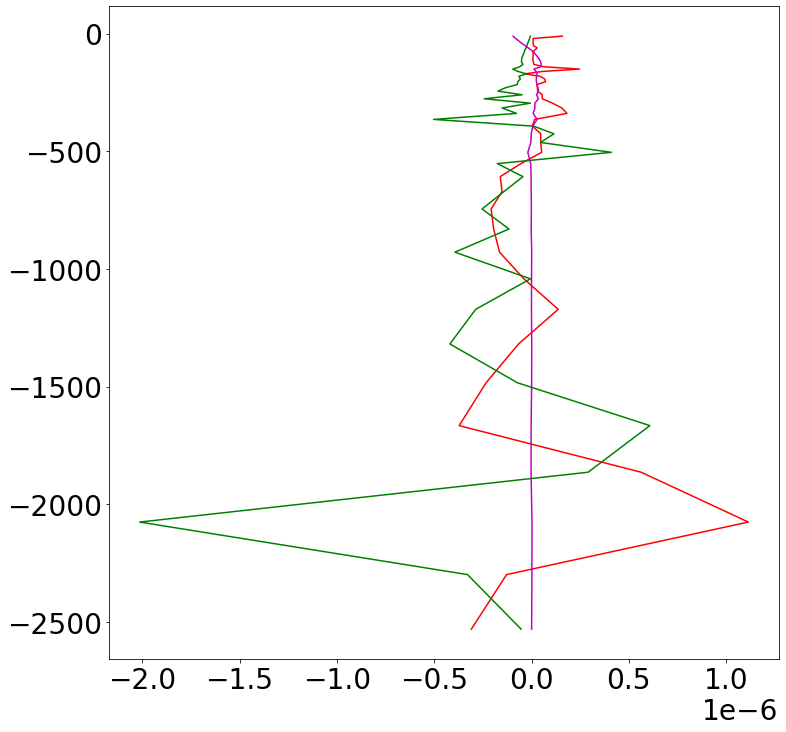

In [18]:
hadv = ds.timeMonthly_avg_activeTracerHorizontalAdvectionTendency_salinityHorizontalAdvectionTendency[0,inds[ns],:].values
vadv = ds.timeMonthly_avg_activeTracerVerticalAdvectionTendency_salinityVerticalAdvectionTendency[0,inds[ns],:].values
vmix = ds.timeMonthly_avg_activeTracerVertMixTendency_salinityVertMixTendency[0,inds[ns],:].values
hmix = ds.timeMonthly_avg_activeTracerHorMixTendency_salinityHorMixTendency[0,inds[ns],:].values
nlt = ds.timeMonthly_avg_activeTracerNonLocalTendency_salinityNonLocalTendency[0,inds[ns],:].values
#plt.plot(hadv[:mlc],-mesh.refBottomDepth[:mlc],'k')
#plt.plot(vadv[:mlc],-mesh.refBottomDepth[:mlc],'b')
plt.plot(hadv[:mlc]+vadv[:mlc],-mesh.refBottomDepth[:mlc],'r')
plt.plot(hmix[:mlc],-mesh.refBottomDepth[:mlc],'g')
plt.plot(vmix[:mlc]+nlt[:mlc],-mesh.refBottomDepth[:mlc],'m')